# Question 9

Write a program to read the data from the following link, perform data analysis and answer the following
questions
Note -
1. Write code comments wherever required for code understanding

    Insights to be drawn -
    ● Get all the cars and their types that do not qualify for clean alternative fuel vehicle
    ● Get all TESLA cars with the model year, and model type made in Bothell City.
    ● Get all the cars that have an electric range of more than 100, and were made after
    2015
    ● Draw plots to show the distribution between city and electric vehicle type

DataLink - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD

In [1]:
# importing neccesary libraries
import pandas as pd   # for reading dataset and analysis
import matplotlib.pyplot as plt         # for visualization

In [2]:
# Read the data from the CSV file
data_url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(data_url)    
# df = pd.read_csv("Electric_Vehicle_Population_Data")   # use this also after downloading file

In [3]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1DV4N,Island,Clinton,WA,98236.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10


In [4]:
df.info()   # get information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135038 entries, 0 to 135037
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         135038 non-null  object 
 1   County                                             135030 non-null  object 
 2   City                                               135030 non-null  object 
 3   State                                              135038 non-null  object 
 4   Postal Code                                        135030 non-null  float64
 5   Model Year                                         135038 non-null  int64  
 6   Make                                               135038 non-null  object 
 7   Model                                              134789 non-null  object 
 8   Electric Vehicle Type                              135038 non-null  object

#### Get all the cars and their types that do not qualify for clean alternative fuel vehicle

In [6]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()  # get values count of feature

Clean Alternative Fuel Vehicle Eligible                         61221
Eligibility unknown as battery range has not been researched    56983
Not eligible due to low battery range                           16834
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64

In [7]:
non_clean_cars = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] != 'Clean Alternative Fuel Vehicle Eligible']
non_clean_cars_data = non_clean_cars[['Make', 'Model']]  #Get all the cars and their types that do not qualify 
                                                              #for clean alternative fuel vehicle
print("Cars and their types that do not qualify for clean alternative fuel vehicle:")
print(non_clean_cars_data)

Cars and their types that do not qualify for clean alternative fuel vehicle:
           Make        Model
1        NISSAN         LEAF
7          AUDI         Q5 E
8        TOYOTA  PRIUS PRIME
12          KIA         NIRO
20         AUDI         Q5 E
...         ...          ...
135031    TESLA      MODEL Y
135034    TESLA      MODEL Y
135035    TESLA      MODEL S
135036  HYUNDAI      IONIQ 5
135037     FORD        C-MAX

[73817 rows x 2 columns]


#### Get all TESLA cars with the model year, and model type made in Bothell City.

In [9]:
tesla_cars_bothell = df[(df['Make'] == 'TESLA') & (df['City'] == 'Bothell')]   # filtering the for reuired condition
tesla_cars_bothell_data = tesla_cars_bothell[['Model Year', 'Model']]
print("\nTESLA cars with the model year, and model type made in Bothell City:")
print(tesla_cars_bothell_data)  #Get all TESLA cars with the model year, and model type made in Bothell City.


TESLA cars with the model year, and model type made in Bothell City:
        Model Year    Model
11            2020  MODEL Y
18            2020  MODEL Y
69            2018  MODEL 3
72            2018  MODEL 3
88            2017  MODEL S
...            ...      ...
134951        2019  MODEL 3
134999        2020  MODEL S
135005        2022  MODEL Y
135012        2021  MODEL Y
135021        2022  MODEL Y

[2548 rows x 2 columns]


#### Get all the cars that have an electric range of more than 100, and were made after 2015

In [8]:
electric_cars_100_range = df[(df['Electric Range'] > 100) & (df['Model Year'] > 2015)]# filtering the for reuired condition
electric_cars_100_range_data = electric_cars_100_range[['Make', 'Model']]
print("\nCars with an electric range of more than 100 and made after 2015:")
print(electric_cars_100_range_data) # Get all the cars that have an electric range of more than 100, and were made after 2015


Cars with an electric range of more than 100 and made after 2015:
          Make    Model
0        TESLA  MODEL X
2        TESLA  MODEL 3
4        TESLA  MODEL S
12       TESLA  MODEL 3
13       TESLA  MODEL 3
...        ...      ...
130417   TESLA  MODEL Y
130428  NISSAN     LEAF
130432   TESLA  MODEL Y
130436   TESLA  MODEL 3
130441   TESLA  MODEL X

[34066 rows x 2 columns]


#### Draw plots to show the distribution between city and electric vehicle type

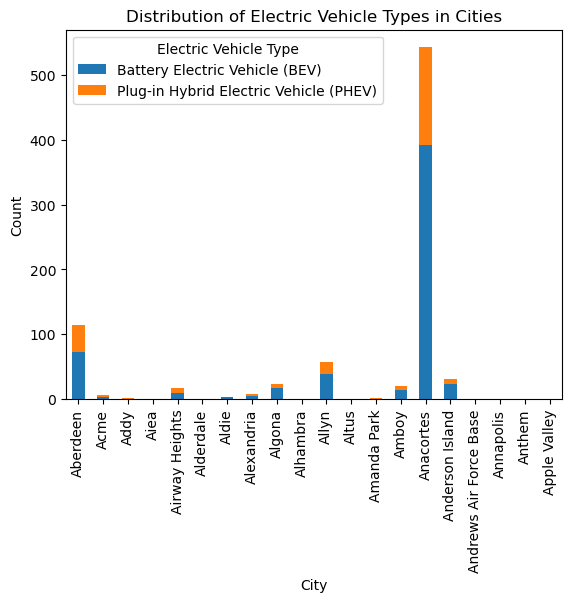

In [9]:
# Draw plots to show the distribution between city and electric vehicle type
elv =  df.loc[:,["City","Electric Vehicle Type"]]
counts = elv.groupby(['City', 'Electric Vehicle Type']).size().unstack()[:20]     # use group_by function to get count 

counts.plot(kind='bar', stacked=True)   # Create a bar plot
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Electric Vehicle Types in Cities')
plt.legend(title='Electric Vehicle Type')
plt.show()